Этот ноутбук содержит пример построения рекомендательной системы видеоигр. В качестве даатасета взяты данные Amazon https://nijianmo.github.io/amazon/index.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
palette = seaborn.set_palette(seaborn.color_palette())

from surprise import Dataset, Reader, KNNBasic, SVD, CoClustering, BaselineOnly, accuracy
from surprise.model_selection.split import train_test_split

%matplotlib inline

In [2]:
data_path = '../data/Video_Games.csv'
data = pd.read_csv(data_path, names=['item', 'user', 'rating', 'timestamp'])
data.head()

,item,user,rating,timestamp
0,0439381673,A21ROB4YDOZA5P,1.0,1402272000
1,0439381673,A3TNZ2Q5E7HTHD,3.0,1399680000
2,0439381673,A1OKRM3QFEATQO,4.0,1391731200
3,0439381673,A2XO1JFCNEYV3T,1.0,1391731200
4,0439381673,A19WLPIRHD15TH,4.0,1389830400


# EDA


In [3]:
sum(data['rating'].isna())

0

In [4]:
print(f'Item count: {len(data["item"].unique())}\nUser count: {len(data["user"].unique())}')

Item count: 71982
User count: 1540618


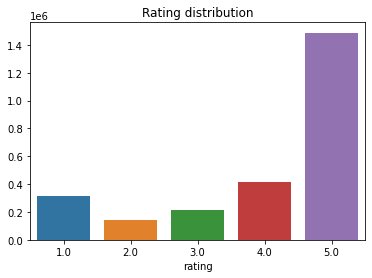

In [5]:
rating_count = data.groupby('rating').apply(len)
plt.title('Rating distribution')
seaborn.barplot(x=rating_count.index, y=rating_count.values)
plt.show()

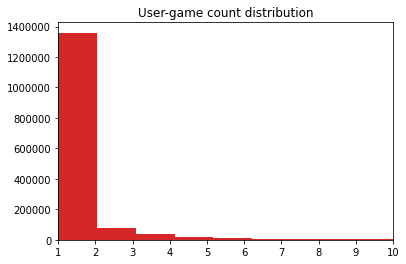

In [19]:
user_game_count = data.groupby('user').apply(len)
plt.title('User-game count distribution')
plt.xlim(1, 10)
plt.gca().ticklabel_format(style='plain')
plt.hist(user_game_count.values, bins=850, color=seaborn.color_palette()[3])
plt.show()

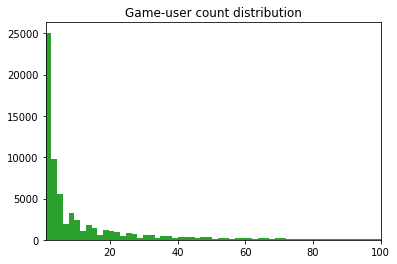

In [18]:
game_user_count = data.groupby('item').apply(len)
plt.title('Game-user count distribution')
plt.xlim(1, 100)
plt.gca().ticklabel_format(style='plain')
plt.hist(game_user_count.values, bins=4500, color=seaborn.color_palette()[2])
plt.show()

# ML

In [8]:
reader = Reader(line_format='item user rating timestamp', rating_scale=(1, 5), sep=',')
dataset = Dataset.load_from_file(data_path, reader)
train_dataset, test_dataset = train_test_split(dataset, train_size=0.2)


## Baseline algorithm

In [9]:
base_algo = BaselineOnly()
base_algo.fit(train_dataset)

Estimating biases using als...


In [10]:
predictions = base_algo.test(test_dataset)
accuracy.rmse(predictions)

RMSE: 1.3256


1.3256040406468528

In [13]:
cluster_algo = CoClustering()
cluster_algo.fit(train_dataset)

<ipython-input-13-579944ac6e4c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cluster_algo.fit(train_dataset)


In [14]:
predictions = cluster_algo.test(test_dataset)
accuracy.rmse(predictions)

RMSE: 1.4271


1.4270773911999317

## SVD

In [15]:
algo = SVD()
algo.fit(train_dataset)

In [16]:
predictions = algo.test(test_dataset)
accuracy.rmse(predictions)

RMSE: 1.3218


1.3217868210974701

Рекомендательная система на основе svd получилась не сильно лучше базовой системы рекомендаций



